# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [3]:
books = pd.read_parquet("books.parquet")

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

In [10]:
df=pd.DataFrame(books)
df.describe()

,book_id,num_pages,average_rating,ratings_count,text_reviews_count,publication_year
count,4.331200e+04,37001.0,43312.00000,43312.0,43312.000000,35891.0
mean,8.050797e+06,337.866085,3.99872,13361.85272,637.829239,2006.881084
std,9.315783e+06,256.097045,0.31284,78911.120232,2553.203776,167.257929
min,1.000000e+00,0.0,0.00000,0.0,0.000000,13.0
25%,2.544730e+05,224.0,3.81000,328.0,29.000000,2002.0
50%,3.354695e+06,313.0,4.01000,1834.0,120.000000,2008.0
75%,1.429010e+07,400.0,4.20000,7310.0,435.000000,2012.0
max,3.652450e+07,14777.0,5.00000,4899965.0,142645.000000,20136.0


Пример данных по книгам

In [4]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [4]:
interactions = pd.read_parquet("interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [39]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


In [53]:
interactions.head(10)
interactions["is_read"].nunique()
interactions["rating"].unique()


interactions.query("rating==0 and is_reviewed==False")
#interactions.query("is_reviewed==False")

aa=interactions.groupby(["user_id"]).agg({"book_id":"nunique"}).reset_index()

In [64]:
interactions

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False
...,...,...,...,...,...,...,...
12914454,d890e8079d8896e0cc6c4f178634850a,14836,2016-11-29,2017-01-15,True,3,False
12914455,d0f6d1a4edcab80a6010cfcfeda4999f,14935,2012-06-10,2012-06-10,True,5,False
12914456,b0883ebf8e31731f1c5d91e678c26666,10210,2012-06-05,2013-01-17,True,5,False
12914457,b0883ebf8e31731f1c5d91e678c26666,99561,2012-07-21,2012-07-22,True,4,False


In [57]:
users=aa.query("book_id>=2")["user_id"]

In [58]:
s1 = pd.merge(interactions, users, how='inner', on=['user_id'])
s1

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False
...,...,...,...,...,...,...,...
12805129,d890e8079d8896e0cc6c4f178634850a,5297,2017-02-07,2017-02-26,True,5,False
12805130,d890e8079d8896e0cc6c4f178634850a,4900,2016-12-22,2016-12-29,True,2,False
12805131,d890e8079d8896e0cc6c4f178634850a,14836,2016-11-29,2017-01-15,True,3,False
12805132,b0883ebf8e31731f1c5d91e678c26666,10210,2012-06-05,2013-01-17,True,5,False


Пример данных по взаимодействиям

In [8]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [16]:
books.sample(3).T

,1629482,673404,1150963
book_id,12555,6405929,8272246
author,Amy Tan,James Patterson,Cathy Glass
title,The Bonesetter's Daughter,"I, Alex Cross (Alex Cross, #16)",Mummy Told Me Not to Tell
description,"Ruth Young and her widowed mother, LuLing, hav...",Can Alex Cross survive his most chilling - and...,When Reece arrives at Cathy's door at 7 years ...
genre_and_votes,"{'Fiction': 1502, 'Historical-Historical Ficti...","{'Mystery': 392, 'Fiction': 273, 'Thriller': 188}","{'Nonfiction': 65, 'Sociology-Abuse': 22, 'Aut..."
num_pages,368,278,344
average_rating,3.98,3.99,4.35
ratings_count,100625,27446,2523
text_reviews_count,2363,1403,110
publisher,,,Harper Element


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [17]:
books["book_id"].nunique()

43312

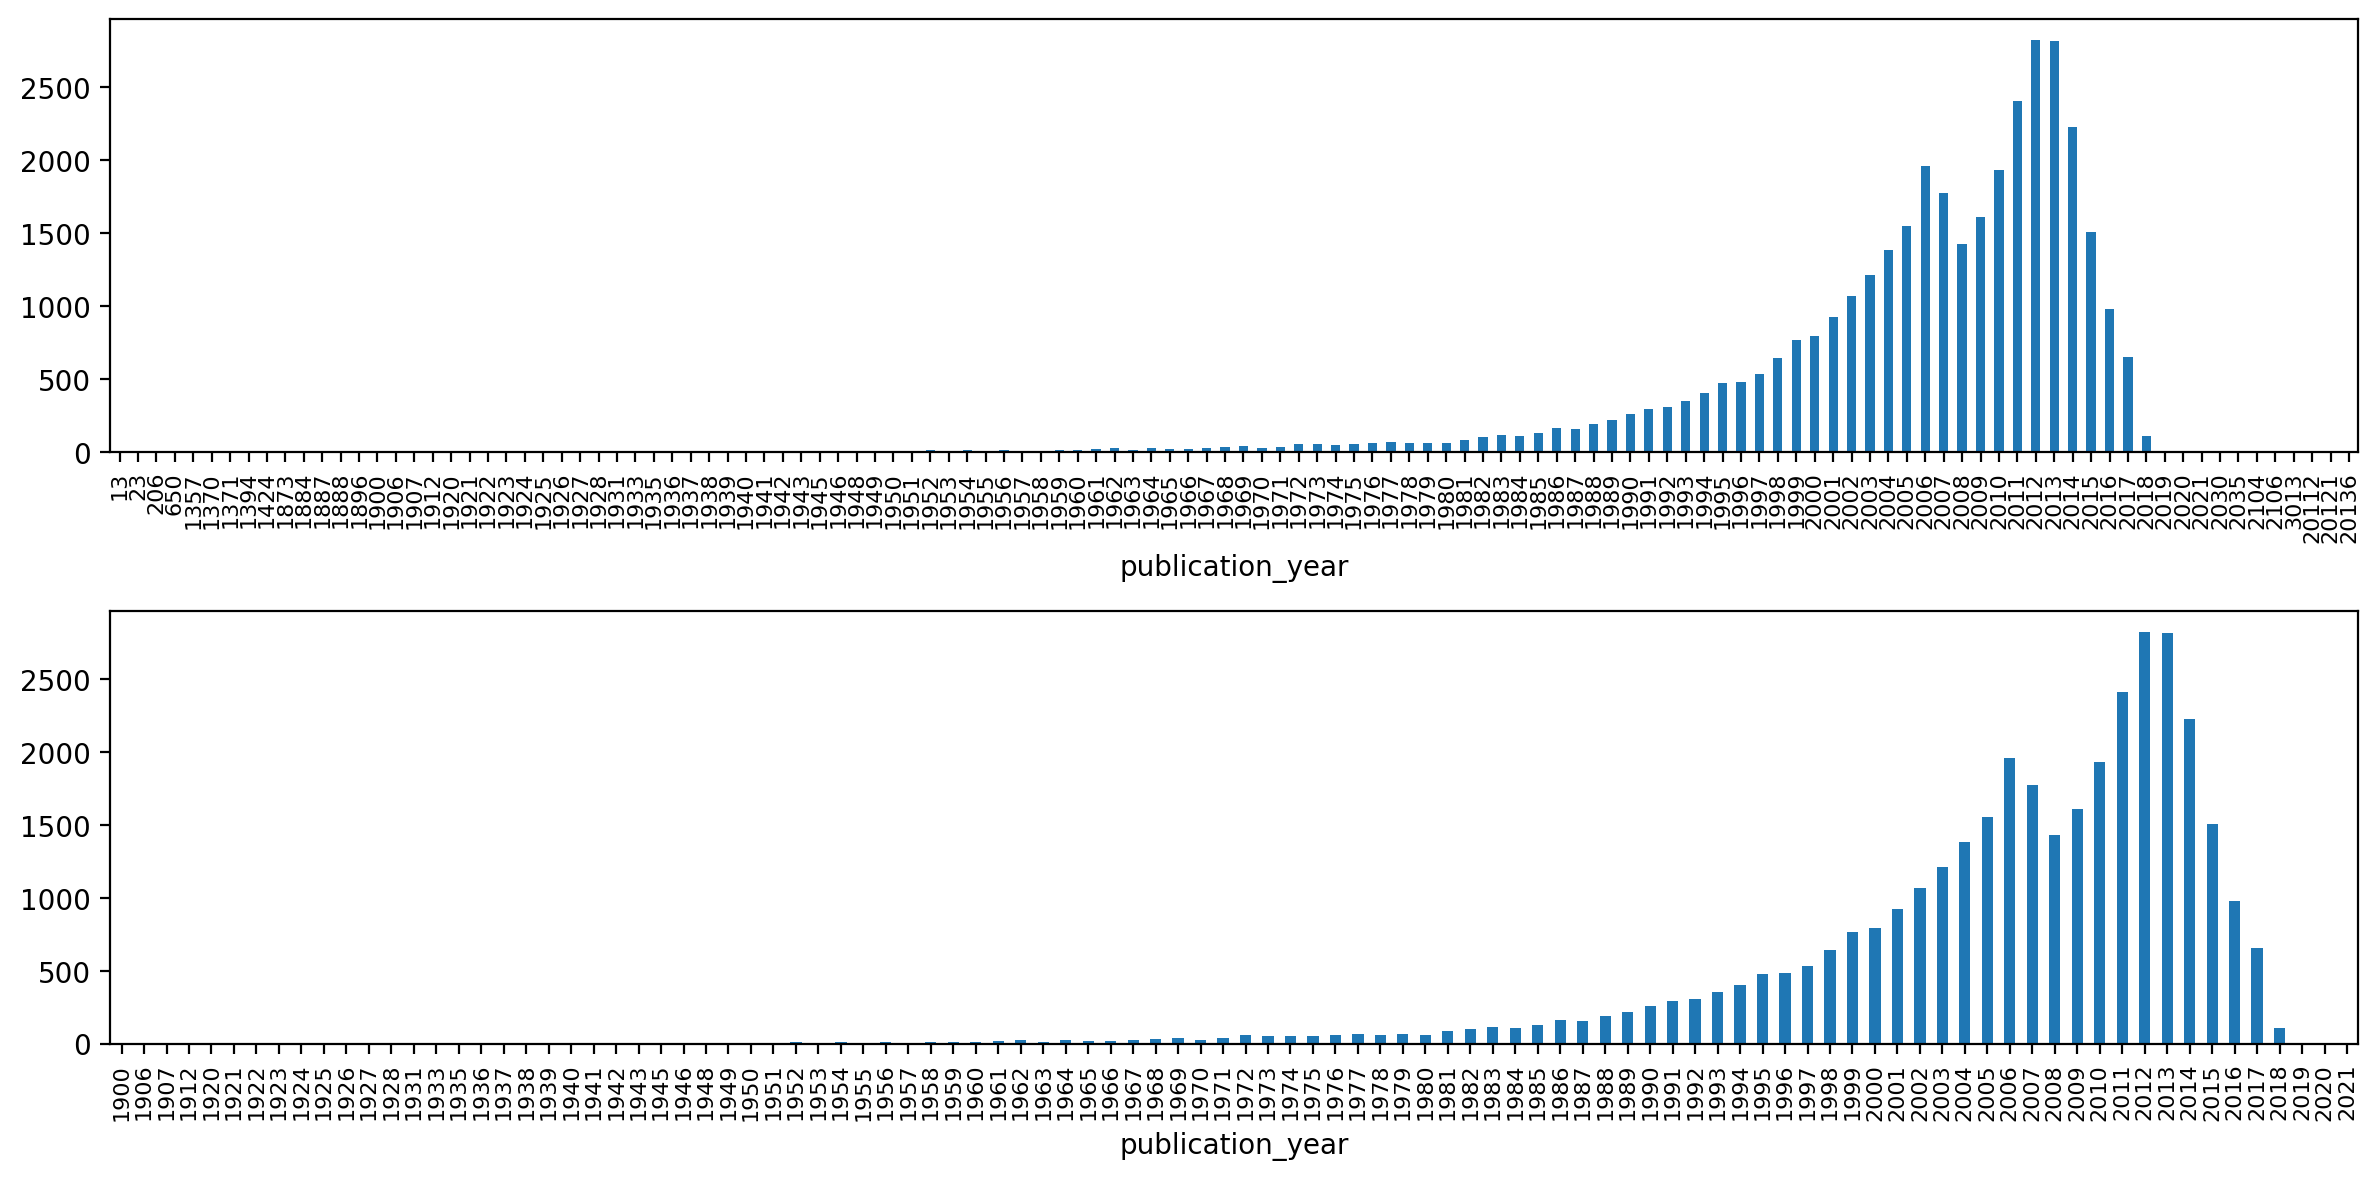

In [18]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [19]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [20]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [21]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


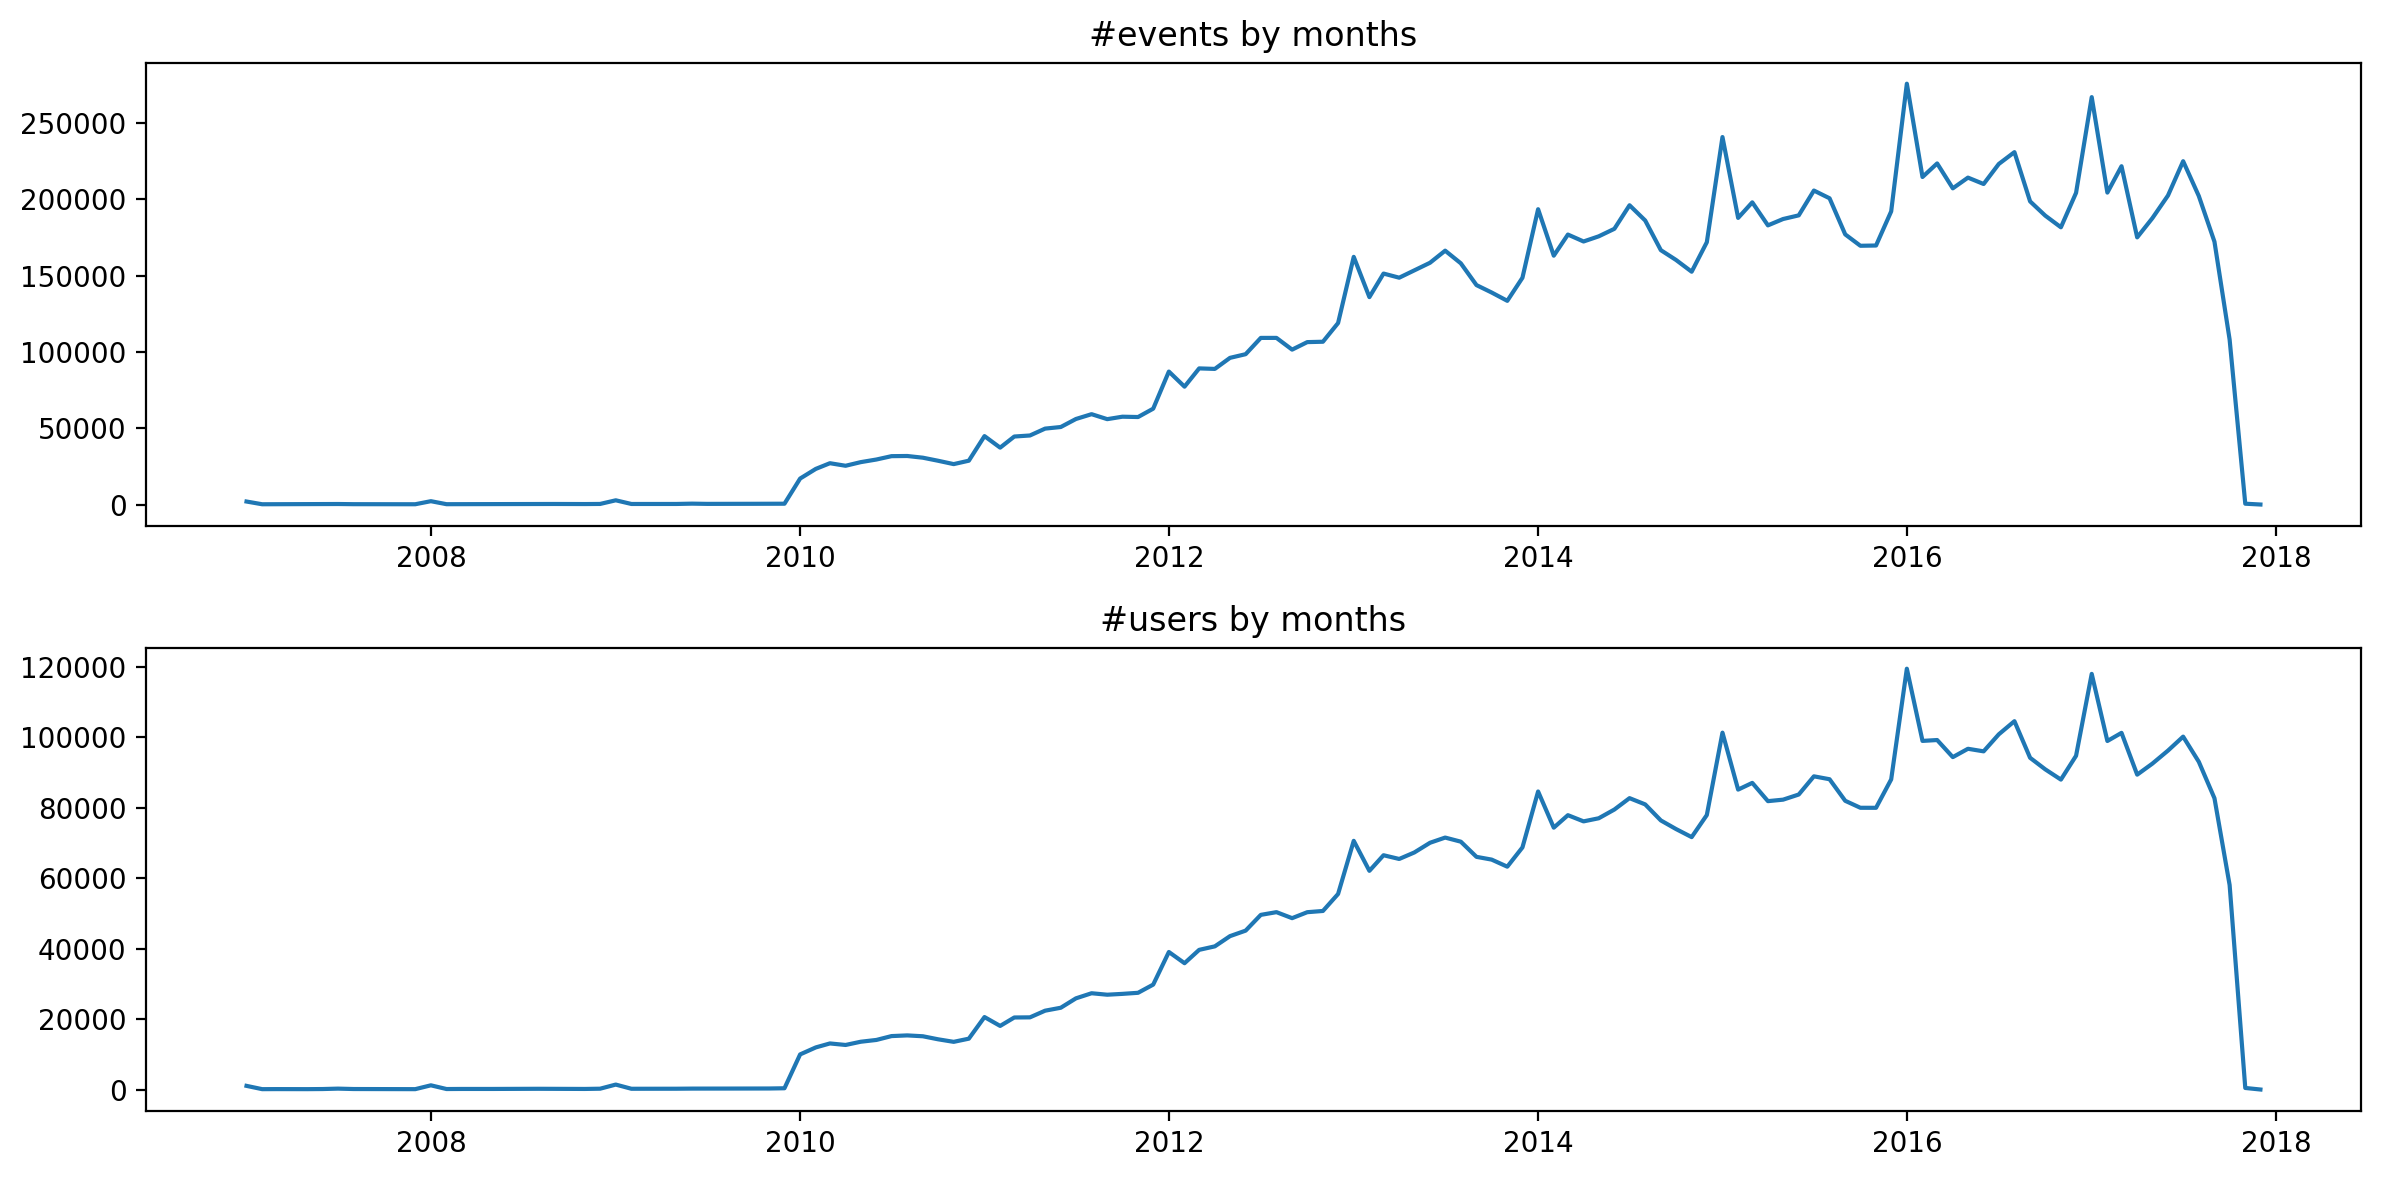

In [22]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [5]:
items = books.copy()
events = interactions.copy()

In [8]:
events.groupby(["rating"]).agg({"user_id":"count"}).reset_index()

,rating,user_id
0,0,1051672
1,1,183770
2,2,671089
3,3,2564629
4,4,4559434
5,5,3859840


In [9]:
# без рейтинга
events.query("rating==0")

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False
25,8842281e1d1347389f2ab93d60773d4d,83518,2010-08-15,2011-12-23,True,0,False
39,d986f354a045ffb91234e4af4d1b12fd,23278537,2017-07-06,2017-08-09,True,0,False
40,d986f354a045ffb91234e4af4d1b12fd,17345258,2017-08-11,2017-08-26,True,0,False
41,d986f354a045ffb91234e4af4d1b12fd,30555488,2017-10-08,2017-10-26,True,0,False
...,...,...,...,...,...,...,...
12914392,2baa3e4fc6f0a95a6cb416a10347ed4c,12327708,2013-05-20,2013-06-10,True,0,False
12914393,2baa3e4fc6f0a95a6cb416a10347ed4c,134353,2013-01-12,2013-02-23,True,0,False
12914422,8da145f238331c87f5904709c97c8ddc,27401883,2017-10-22,2017-11-01,True,0,False
12914436,8fbf5fe02cd3c056c70a6600bad3561e,13637412,2015-10-17,2016-04-14,True,0,False


In [34]:
events.query("is_read==False")

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month


In [24]:
del books
del interactions

In [6]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

In [10]:
events

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False
...,...,...,...,...,...,...,...
12914454,d890e8079d8896e0cc6c4f178634850a,14836,2016-11-29,2017-01-15,True,3,False
12914455,d0f6d1a4edcab80a6010cfcfeda4999f,14935,2012-06-10,2012-06-10,True,5,False
12914456,b0883ebf8e31731f1c5d91e678c26666,10210,2012-06-05,2013-01-17,True,5,False
12914457,b0883ebf8e31731f1c5d91e678c26666,99561,2012-07-21,2012-07-22,True,4,False


In [ ]:
#оставим события с рейтингом и пользователей с 2мя и более книгами

In [7]:
aa=events.groupby(["user_id"]).agg({"book_id":"nunique"}).reset_index()
users=aa.query("book_id>=2")["user_id"]
s1 = pd.merge(events, users, how='inner', on=['user_id'])
events=s1

In [67]:
events.query("rating==0 and is_reviewed==False") #такое надо удалять

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False
25,8842281e1d1347389f2ab93d60773d4d,83518,2010-08-15,2011-12-23,True,0,False
39,d986f354a045ffb91234e4af4d1b12fd,23278537,2017-07-06,2017-08-09,True,0,False
40,d986f354a045ffb91234e4af4d1b12fd,17345258,2017-08-11,2017-08-26,True,0,False
41,d986f354a045ffb91234e4af4d1b12fd,30555488,2017-10-08,2017-10-26,True,0,False
...,...,...,...,...,...,...,...
12802152,7580887d5c5ec32ab56d3f0133853e6a,10327303,2013-01-14,2013-05-04,True,0,False
12802153,7580887d5c5ec32ab56d3f0133853e6a,11750648,2013-05-04,2014-03-06,True,0,False
12802167,2baa3e4fc6f0a95a6cb416a10347ed4c,12327708,2013-05-20,2013-06-10,True,0,False
12802168,2baa3e4fc6f0a95a6cb416a10347ed4c,134353,2013-01-12,2013-02-23,True,0,False


# Ваш код здесь

In [8]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2017-08-01").date()

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

# количество пользователей, которые есть и в train, и в test
common_users = events["user_id"].drop_duplicates()

print(len(users_train), len(users_test), len(common_users)) 

454629 134513 457218


In [10]:
pd_common_users=pd.DataFrame(common_users)

In [11]:
pd_common_users['all']='all'

In [31]:
pd_common_users

,user_id,all
0,8842281e1d1347389f2ab93d60773d4d,all
36,ab2923b738ea3082f5f3efcbbfacb218,all
39,d986f354a045ffb91234e4af4d1b12fd,all
84,7504b2aee1ecb5b2872d3da381c6c91e,all
193,f8a89075dc6de14857561522e729f82c,all
...,...,...
12805110,8fbf5fe02cd3c056c70a6600bad3561e,all
12805120,fc5aea6994fc754daefa27cbea10ac79,all
12805123,148e49f7ed14137ff13a9a31c770487d,all
12805127,d890e8079d8896e0cc6c4f178634850a,all


In [9]:
pd_users_test=pd.DataFrame(users_test)
pd_users_test['name']='test'

pd_users_train=pd.DataFrame(users_train)
pd_users_train['name_train']='train'

In [42]:
#***************
#получились холодные пользователм
USERS = pd_common_users.set_index('user_id').join([pd_users_test.set_index('user_id'),pd_users_train.set_index('user_id')],how='left')

cold_users=USERS.query('name=="test" and name_train !="train"').reset_index()['user_id']
cold_users
#***************

0       d6e3461a1dd077966faf7145d52dcc6a
1       c9754994dd9f2865450991e451c7f9bb
2       a40c7f60713d4981817ec67fc8a99962
3       cb8c5b621d1b22c5651f9febf0251881
4       1058ffb992054a8b94cf57a95cc891f2
                      ...               
2584    6128e8e6ad666bd0f8cab5de33c9239b
2585    c1155b16c6da4fb50f9970875d73b41a
2586    748a300738721d62439847db28004268
2587    6a2d51b403cb857c7b99ac9f1a9da199
2588    967f6327480b86eac8d5309ec9a831be
Name: user_id, Length: 2589, dtype: object

In [71]:
#pd.merge(users_train,users_test,on=["user_id"],how="inner")

,user_id
0,d986f354a045ffb91234e4af4d1b12fd
1,7504b2aee1ecb5b2872d3da381c6c91e
2,704eb93a316aff687a93d5215882eb21
3,012515e5802b2e0f42915118c90fa04b
4,1711b2a40d154603f157536619f71967
...,...
131919,3a337e150ed5f95722e223634360a677
131920,56a33f92124c767bce5cd681fd8fdbad
131921,62c890a804f9ca7a7012115a20aef13c
131922,5c2fbc4c0d2de47a0ece42c5fe171552


In [13]:
#холодные пользователи
#users_test
#cold_users=pd.merge(users_test,users_train,on=["user_id"],how="inner")
#cold_users

In [14]:
#pd_users_test=pd.DataFrame(users_test)
#pd_users_test['name']='test'

#pd_users_train=pd.DataFrame(users_train)
#pd_users_train['name_train']='train'

In [15]:
#cold_users = pd_users_test.set_index('user_id').join(pd_users_train.set_index('user_id'),how='inner')

In [16]:
#cold_users.nunique()

In [17]:
#item_id>>book_id
# рекомендации для холодных пользователей (топ 100 книг с 2015 года с оценкой не менее 4х)
from sklearn.preprocessing import MinMaxScaler


#c 2015 года
top_pop_start_date = pd.to_datetime("2015-01-01").date()

# с 2015 года, группировка по книгам - количество уникальных пользователей, средний рейтинг
item_popularity = events_train.query("started_at >= @top_pop_start_date").groupby(["book_id"]).agg(users=("user_id", "nunique"), avg_rating=("rating", "mean")).reset_index()

# нормализация пользователей и среднего рейтинга, требуется для их приведения к одному масштабу
scaler = MinMaxScaler()
item_popularity[["users_norm", "avg_rating_norm"]] = scaler.fit_transform(
    item_popularity[["users", "avg_rating"]]
)

item_popularity

,book_id,users,avg_rating,users_norm,avg_rating_norm
0,1,9648,4.341625,0.220000,0.868325
1,2,10592,4.221771,0.241528,0.844354
2,3,16478,4.338512,0.375758,0.867702
3,5,13173,4.309041,0.300388,0.861808
4,6,11900,4.281429,0.271357,0.856286
...,...,...,...,...,...
39244,35818330,59,3.813559,0.001323,0.762712
39245,35828620,1,4.000000,0.000000,0.800000
39246,35852112,2,5.000000,0.000023,1.000000
39247,35961572,1,0.000000,0.000000,0.000000


In [23]:
#отбираем книги только с хорошими оценками - от 4х
item_popularity=item_popularity.query('avg_rating>=4')

In [24]:
item_popularity

,book_id,users,avg_rating,users_norm,avg_rating_norm,popularity_score
32664,18007564,21462,4.073386,0.489418,0.814677,0.398718
32903,18143977,20907,4.002105,0.476762,0.800421,0.381610
30950,16096824,17768,4.065286,0.405177,0.813057,0.329432
2,3,16478,4.338512,0.375758,0.867702,0.326046
1921,15881,14510,4.166644,0.330878,0.833329,0.275730
...,...,...,...,...,...,...
6279,87284,1,4.000000,0.000000,0.800000,0.000000
6284,87426,1,4.000000,0.000000,0.800000,0.000000
11249,294395,1,4.000000,0.000000,0.800000,0.000000
11254,294475,1,4.000000,0.000000,0.800000,0.000000


In [25]:

# вычисляем popularity_score, как скор популярности со штрафом за низкий рейтинг
item_popularity["popularity_score"] = (
    item_popularity["users_norm"] * item_popularity["avg_rating_norm"]
)
item_popularity

/tmp/ipykernel_45391/1151968994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_popularity["popularity_score"] = (


,book_id,users,avg_rating,users_norm,avg_rating_norm,popularity_score
32664,18007564,21462,4.073386,0.489418,0.814677,0.398718
32903,18143977,20907,4.002105,0.476762,0.800421,0.381610
30950,16096824,17768,4.065286,0.405177,0.813057,0.329432
2,3,16478,4.338512,0.375758,0.867702,0.326046
1921,15881,14510,4.166644,0.330878,0.833329,0.275730
...,...,...,...,...,...,...
6279,87284,1,4.000000,0.000000,0.800000,0.000000
6284,87426,1,4.000000,0.000000,0.800000,0.000000
11249,294395,1,4.000000,0.000000,0.800000,0.000000
11254,294475,1,4.000000,0.000000,0.800000,0.000000


In [30]:

# сортируем по убыванию popularity_score
item_popularity = item_popularity.sort_values(by="popularity_score",ascending=False)

item_popularity
# выбираем первые 100 айтемов со средней оценкой avg_rating не меньше 4
top_k_pop_items = item_popularity.head(100)
top_k_pop_items 

,book_id,users,avg_rating,users_norm,avg_rating_norm,popularity_score
32664,18007564,21462,4.073386,0.489418,0.814677,0.398718
32903,18143977,20907,4.002105,0.476762,0.800421,0.381610
30950,16096824,17768,4.065286,0.405177,0.813057,0.329432
2,3,16478,4.338512,0.375758,0.867702,0.326046
1921,15881,14510,4.166644,0.330878,0.833329,0.275730
...,...,...,...,...,...,...
34515,20821284,2323,4.033577,0.052953,0.806715,0.042718
38072,29363501,2301,4.023033,0.052452,0.804607,0.042203
964,8127,2221,4.054930,0.050627,0.810986,0.041058
37206,25883848,2237,4.018775,0.050992,0.803755,0.040985


In [31]:
#рекомендациями по умолчанию (англ. default recommendations)
# добавляем информацию о книгах
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("book_id")[["author", "title", "genre_and_votes", "publication_year"]], on="book_id")

with pd.option_context('display.max_rows', 100):
    display(top_k_pop_items[["book_id", "author", "title", "publication_year", "users", "avg_rating", "popularity_score", "genre_and_votes"]].head(10))

,book_id,author,title,publication_year,users,avg_rating,popularity_score,genre_and_votes
0,18007564,Andy Weir,The Martian,2014,21462,4.073386,0.398718,"{'Science Fiction': 11966, 'Fiction': 8430}"
1,18143977,Anthony Doerr,All the Light We Cannot See,2014,20907,4.002105,0.381610,"{'Historical-Historical Fiction': 13679, 'Fict..."
2,16096824,Sarah J. Maas,A Court of Thorns and Roses (A Court of Thorns...,2015,17768,4.065286,0.329432,"{'Fantasy': 14326, 'Young Adult': 4662, 'Roman..."
3,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,1997,16478,4.338512,0.326046,"{'Fantasy': 59818, 'Fiction': 17918, 'Young Ad..."
4,15881,"J.K. Rowling, Mary GrandPré",Harry Potter and the Chamber of Secrets (Harry...,1999,14510,4.166644,0.275730,"{'Fantasy': 50130, 'Young Adult': 15202, 'Fict..."
5,17927395,Sarah J. Maas,A Court of Mist and Fury (A Court of Thorns an...,2016,12971,4.445532,0.262981,"{'Fantasy': 10186, 'Romance': 3346, 'Young Adu..."
6,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Prisoner of Azkaban (Harr...,2004,13173,4.309041,0.258877,"{'Fantasy': 49784, 'Young Adult': 15393, 'Fict..."
7,13206900,Marissa Meyer,"Winter (The Lunar Chronicles, #4)",2015,13213,4.221070,0.254362,"{'Fantasy': 4835, 'Young Adult': 4672, 'Scienc..."
8,21853621,Kristin Hannah,The Nightingale,2015,12929,4.312940,0.254311,"{'Historical-Historical Fiction': 10105, 'Fict..."
9,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,2002,11900,4.281429,0.232359,"{'Fantasy': 48257, 'Young Adult': 15483, 'Fict..."


In [46]:
# см на качество рекомендаций
cold_users_events_with_recs = events_test[events_test["user_id"].isin(cold_users)].merge(top_k_pop_items, on="book_id", how="left")

In [47]:
cold_users_events_with_recs

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed,users,avg_rating,users_norm,avg_rating_norm,popularity_score,author,title,genre_and_votes,publication_year
0,d6e3461a1dd077966faf7145d52dcc6a,6900,2017-10-09,2017-10-13,True,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1,d6e3461a1dd077966faf7145d52dcc6a,12555,2017-09-21,2017-10-11,True,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2,d6e3461a1dd077966faf7145d52dcc6a,25899336,2017-09-12,2017-09-17,True,4,True,5197.0,4.098518,0.118495,0.819704,0.097131,Paul Kalanithi,When Breath Becomes Air,"{'Nonfiction': 5848, 'Autobiography-Memoir': 3...",<NA>
3,d6e3461a1dd077966faf7145d52dcc6a,21936809,2017-08-20,2017-08-24,True,4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,d6e3461a1dd077966faf7145d52dcc6a,6952,2017-09-18,2017-09-20,True,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10765,967f6327480b86eac8d5309ec9a831be,16181775,2017-09-24,2017-09-25,True,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
10766,967f6327480b86eac8d5309ec9a831be,10210,2017-09-16,2017-09-24,True,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
10767,967f6327480b86eac8d5309ec9a831be,14935,2017-09-05,2017-09-16,True,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
10768,967f6327480b86eac8d5309ec9a831be,7907782,2017-08-15,2017-09-05,True,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [58]:
cold_users_events_with_recs['no_rating'] = cold_users_events_with_recs["avg_rating"].isnull()
cold_user_items_no_avg_rating_idx=cold_users_events_with_recs.query('no_rating==True')

In [63]:
cold_user_recs=cold_users_events_with_recs.query('no_rating==False')[["user_id", "book_id", "rating", "avg_rating"]] 
cold_user_recs['rating_diff']=cold_user_recs['rating']-round(cold_user_recs['avg_rating'],0)
cold_user_recs.groupby('rating_diff').agg({'rating':'count'})

#282 из 1346 - 20% холодных пользователей воспользовались рекомендациями

,rating
rating_diff,
-4.0,157
-3.0,1
-2.0,13
-1.0,62
0.0,282
1.0,831


In [64]:
#задание 6 - посчитать метрики mae rmse


# посчитаем метрики рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(cold_user_recs["rating"], cold_user_recs["avg_rating"], squared=False)
mae = mean_absolute_error(cold_user_recs["rating"], cold_user_recs["avg_rating"])
print(round(rmse, 2), round(mae, 2))

1.6 1.09


In [65]:
# посчитаем покрытие холодных пользователей рекомендациями

cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("avg_rating", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

Доля пользователей без релевантных рекомендаций: 0.70
Среднее покрытие пользователей: 0.39


In [48]:
events_test[events_test["user_id"].isin(cold_users)]

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
39672,d6e3461a1dd077966faf7145d52dcc6a,6900,2017-10-09,2017-10-13,True,4,False
39673,d6e3461a1dd077966faf7145d52dcc6a,12555,2017-09-21,2017-10-11,True,3,False
39674,d6e3461a1dd077966faf7145d52dcc6a,25899336,2017-09-12,2017-09-17,True,4,True
39675,d6e3461a1dd077966faf7145d52dcc6a,21936809,2017-08-20,2017-08-24,True,4,True
39676,d6e3461a1dd077966faf7145d52dcc6a,6952,2017-09-18,2017-09-20,True,3,False
...,...,...,...,...,...,...,...
12794018,967f6327480b86eac8d5309ec9a831be,16181775,2017-09-24,2017-09-25,True,3,False
12794019,967f6327480b86eac8d5309ec9a831be,10210,2017-09-16,2017-09-24,True,5,False
12794020,967f6327480b86eac8d5309ec9a831be,14935,2017-09-05,2017-09-16,True,0,False
12794021,967f6327480b86eac8d5309ec9a831be,7907782,2017-08-15,2017-09-05,True,4,False


In [101]:
events.query("book_id==22557272")

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
125,7504b2aee1ecb5b2872d3da381c6c91e,22557272,2015-09-05,2015-09-09,True,4,False
261,704eb93a316aff687a93d5215882eb21,22557272,2017-01-26,2017-02-12,True,5,False
274,012515e5802b2e0f42915118c90fa04b,22557272,2017-08-15,2017-08-21,True,3,False
647,4b3636a043e5c99fa27ac897ccfa1151,22557272,2015-11-16,2016-02-16,True,3,False
860,afc070543f19028dc7e7f084a0079f72,22557272,2016-06-26,2016-06-26,True,4,False
...,...,...,...,...,...,...,...
12801813,007461316fe927c634625a2d47fcbcf0,22557272,2016-10-06,2016-10-13,True,4,False
12801885,62c890a804f9ca7a7012115a20aef13c,22557272,2017-03-28,2017-04-03,True,4,True
12801944,3ee7fea59bab471e9484b026fd46755a,22557272,2016-01-13,2016-02-15,True,3,False
12802078,6f0000fd5ea840fca38ec573963b6687,22557272,2015-10-27,2015-10-29,True,4,False


In [105]:
# добавляем информацию о книгах
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("book_id")[["author", "title", "genre_and_votes", "publication_year"]], on="book_id")


In [ ]:
#DEFAULT рекомендации - по умолчанию (для холодного старта)

In [106]:
top_k_pop_items[["book_id", "author", "title", "publication_year", "users", "avg_rating", "popularity_score", "genre_and_votes"]]

,book_id,author,title,publication_year,users,avg_rating,popularity_score,genre_and_votes
0,22557272,Paula Hawkins,The Girl on the Train,2015,43851,3.525005,0.705001,"{'Fiction': 9793, 'Mystery': 9190, 'Thriller':..."
1,29056083,"John Tiffany, Jack Thorne, J.K. Rowling",Harry Potter and the Cursed Child - Parts One ...,2016,28478,3.449505,0.448034,"{'Fantasy': 14466, 'Fiction': 4232, 'Young Adu..."
2,18007564,Andy Weir,The Martian,2014,21462,4.073386,0.398718,"{'Science Fiction': 11966, 'Fiction': 8430}"
3,18143977,Anthony Doerr,All the Light We Cannot See,2014,20907,4.002105,0.381610,"{'Historical-Historical Fiction': 13679, 'Fict..."
4,16096824,Sarah J. Maas,A Court of Thorns and Roses (A Court of Thorns...,2015,17768,4.065286,0.329432,"{'Fantasy': 14326, 'Young Adult': 4662, 'Roman..."
...,...,...,...,...,...,...,...,...
95,15704307,"Brian K. Vaughan, Fiona Staples","Saga, Vol. 1 (Saga, #1)",2012,5636,4.166785,0.107092,"{'Sequential Art-Graphic Novels': 7803, 'Seque..."
96,22318578,"Marie Kondō, Cathy Hirano",The Life-Changing Magic of Tidying Up: The Jap...,2014,7365,3.186694,0.107032,"{'Nonfiction': 6896, 'Self Help': 2846, 'Audio..."
97,17378508,Maggie Stiefvater,"Blue Lily, Lily Blue (The Raven Cycle, #3)",2014,5662,4.048569,0.104533,"{'Fantasy': 5121, 'Young Adult': 3651, 'Fantas..."
98,23848559,Jenny Lawson,Furiously Happy: A Funny Book About Horrible T...,2015,6043,3.766838,0.103805,"{'Nonfiction': 3138, 'Humor': 1914, 'Autobiogr..."


In [43]:
# операторы in not in

#events.query(f"user_id in {users_test}")

In [76]:
uniques=pd.concat([users_train, users_test]).drop_duplicates(keep=False)
#325 тысяч уникальных неповторяющихся в трайн и тест пользователей

In [69]:
##оценить разреженность матрицы оценок

events[['user_id', 'book_id', 'rating']]


events['user_id'].nunique() #435218
events['book_id'].nunique() #41842


#всего вариантов 435218*41842=18 202 557 000
#есть оценки 12 802 224 - 0.7%

41842

In [70]:
events[['user_id', 'book_id', 'rating']]

,user_id,book_id,rating
0,8842281e1d1347389f2ab93d60773d4d,22034,5
1,8842281e1d1347389f2ab93d60773d4d,22318578,5
2,8842281e1d1347389f2ab93d60773d4d,22551730,4
3,8842281e1d1347389f2ab93d60773d4d,22816087,5
4,8842281e1d1347389f2ab93d60773d4d,20527133,0
...,...,...,...
12802219,d890e8079d8896e0cc6c4f178634850a,5297,5
12802220,d890e8079d8896e0cc6c4f178634850a,4900,2
12802221,d890e8079d8896e0cc6c4f178634850a,14836,3
12802222,b0883ebf8e31731f1c5d91e678c26666,10210,5


In [72]:
#SVD алгоритм
from surprise import Dataset, Reader
from surprise import SVD

# используем Reader из библиотеки surprise для преобразования событий (events)
# в формат, необходимый surprise
reader = Reader(rating_scale=(1, 5))
surprise_train_set = Dataset.load_from_df(events_train[['user_id', 'book_id', 'rating']], reader)
surprise_train_set = surprise_train_set.build_full_trainset()

# инициализируем модель
svd_model = SVD(n_factors=100, random_state=0)

# обучаем модель
svd_model.fit(surprise_train_set)

In [74]:
surprise_test_set = list(events_test[['user_id', 'book_id', 'rating']].itertuples(index=False))

# получаем рекомендации для тестовой выборки
svd_predictions = svd_model.test(surprise_test_set)

In [75]:
svd_predictions

[Prediction(uid='d986f354a045ffb91234e4af4d1b12fd', iid=17345258, r_ui=0, est=1.3264592919352522, details={'was_impossible': False}),
 Prediction(uid='d986f354a045ffb91234e4af4d1b12fd', iid=30555488, r_ui=0, est=1, details={'was_impossible': False}),
 Prediction(uid='7504b2aee1ecb5b2872d3da381c6c91e', iid=18467802, r_ui=1, est=3.4633208753988147, details={'was_impossible': False}),
 Prediction(uid='7504b2aee1ecb5b2872d3da381c6c91e', iid=14497, r_ui=0, est=2.9664316643784367, details={'was_impossible': False}),
 Prediction(uid='704eb93a316aff687a93d5215882eb21', iid=10799, r_ui=3, est=3.656977980086772, details={'was_impossible': False}),
 Prediction(uid='012515e5802b2e0f42915118c90fa04b', iid=13206828, r_ui=5, est=4.646520460630147, details={'was_impossible': False}),
 Prediction(uid='012515e5802b2e0f42915118c90fa04b', iid=13206900, r_ui=4, est=4.699604980018309, details={'was_impossible': False}),
 Prediction(uid='012515e5802b2e0f42915118c90fa04b', iid=13206760, r_ui=5, est=4.49838565

In [76]:
from surprise import accuracy

rmse = accuracy.rmse(svd_predictions)
mae = accuracy.mae(svd_predictions)
                     
print(rmse, mae)

RMSE: 1.3412
MAE:  0.9844
1.3412308229048397 0.9844151583558663


In [77]:
#случайные рекомендации
from surprise import NormalPredictor

# инициализируем состояние генератора, это необходимо для получения
# одной и той же последовательности случайных чисел, только в учебных целях
np.random.seed(0)

random_model = NormalPredictor()

random_model.fit(surprise_train_set)
random_predictions = random_model.test(surprise_test_set)

In [78]:
from surprise import accuracy

rmse = accuracy.rmse(random_predictions)
mae = accuracy.mae(random_predictions)
                     
print(rmse, mae)

RMSE: 1.9188
MAE:  1.4898
1.91883436428754 1.4897666908130616


In [85]:
#surprise_test_set

#svd_model.predict('d986f354a045ffb91234e4af4d1b12fd',17345258)
svd_model.predict('704eb93a316aff687a93d5215882eb21', 10799)

Prediction(uid='704eb93a316aff687a93d5215882eb21', iid=10799, r_ui=None, est=3.656977980086772, details={'was_impossible': False})

In [89]:
events.query('is_read==True')['book_id'].unique()

array([   22034, 22318578, 22551730, ...,  1120193, 16157099, 21847032])

In [97]:
def get_recommendations_svd(user_id, all_items, events, model, include_seen=True, n=10):

    """ возвращает n рекомендаций для user_id """
    
    # получим список идентификаторов всех книг
    all_items = set(events['book_id'].unique())
        
    # учитываем флаг, стоит ли уже прочитанные книги включать в рекомендации
    if include_seen:
        items_to_predict = list(all_items)
    else:
        # получим список книг, которые пользователь уже прочитал ("видел")
        seen_items = set(events.query('is_read==True')['book_id'].unique())
        
        # книги, которые пользователь ещё не читал
        # только их и будем включать в рекомендации
        items_to_predict = list(all_items - seen_items)
    
    # получаем скоры для списка книг, т. е. рекомендации
    predictions = [svd_model.predict(user_id,book_id) for book_id in items_to_predict]
    
    # сортируем рекомендации по убыванию скора и берём только n первых
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    return pd.DataFrame([(pred.iid, pred.est) for pred in recommendations], columns=["book_id", "score"])

In [94]:
svd_model.predict('704eb93a316aff687a93d5215882eb21', 2364284)
svd_model.predict('704eb93a316aff687a93d5215882eb21', 356824)


Prediction(uid='704eb93a316aff687a93d5215882eb21', iid=356824, r_ui=None, est=5, details={'was_impossible': False})

In [92]:
get_recommendations_svd('704eb93a316aff687a93d5215882eb21', items, events_test, svd_model)

,book_id,score
0,2364284,5
1,22303684,5
2,20342617,5
3,356824,5
4,23302416,5


In [95]:
surprise_test_set

[Pandas(user_id='d986f354a045ffb91234e4af4d1b12fd', book_id=17345258, rating=0),
 Pandas(user_id='d986f354a045ffb91234e4af4d1b12fd', book_id=30555488, rating=0),
 Pandas(user_id='7504b2aee1ecb5b2872d3da381c6c91e', book_id=18467802, rating=1),
 Pandas(user_id='7504b2aee1ecb5b2872d3da381c6c91e', book_id=14497, rating=0),
 Pandas(user_id='704eb93a316aff687a93d5215882eb21', book_id=10799, rating=3),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=13206828, rating=5),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=13206900, rating=4),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=13206760, rating=5),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=18658071, rating=2),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=25785357, rating=4),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=22557272, rating=3),
 Pandas(user_id='012515e5802b2e0f42915118c90fa04b', book_id=23174274, rating=3),
 Pandas(user_id='012515e5802b2e0f4

In [98]:
get_recommendations_svd('012515e5802b2e0f42915118c90fa04b', items, events_test, svd_model)

,book_id,score
0,13188676,5.000000
1,6642715,5.000000
2,13104080,5.000000
3,42900,4.967130
4,7304203,4.949121
5,17342701,4.942453
6,17927395,4.898867
7,3127736,4.870842
8,29236299,4.869005
9,23766634,4.854068


In [ ]:
#глазами рекомендации
# выберем произвольного пользователя из тренировочной выборки ("прошлого")
user_id = events_train['user_id'].sample().iat[0]

print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    events_train
    .query("user_id == @user_id")
    .merge(items.set_index("item_id")[["author", "title", "genre_and_votes"]], on="item_id")
)
user_history_to_print = user_history[["author", "title", "started_at", "read_at", "rating", "genre_and_votes"]].tail(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_svd(user_id, items, events_train, svd_model)
user_recommendations = user_recommendations.merge(items[["item_id", "author", "title", "genre_and_votes"]], on="item_id")
display(user_recommendations)

# Сохранение результатов

In [26]:
items.to_parquet("items.par")

In [27]:
events.to_parquet("events.par")